# Stationary 



In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

data = np.random.randn(100).cumsum()  # 随机游走序列 非平稳示例
series = pd.Series(data)

# ADF检验函数
def adf_test(timeseries):
    # print('Results of Augmented Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')  # 自动选择滞后阶数
    # print(f'Test Statistic: {result[0]}')
    # print(f'p-value: {result[1]}')
    # print(f'Number of Lags Used: {result[2]}')
    # print(f'Number of Observations Used: {result[3]}')
    # print('Critical Values:')
    # for key, value in result[4].items():
        # print(f'   {key}: {value}')
    if result[1] < 0.05:
        print("拒绝零假设，时间序列平稳")
        return True
    else:
        print("不能拒绝零假设，时间序列非平稳")
        return False



In [ ]:
import pandas as pd 
from tqdm import tqdm

df = pd.read_json("/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened.jsonl", lines=True)
output_path = "/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened_predicted.jsonl"


filtered_df = df[df['prefix'].str.contains('swing|bird|airplane', case=False, na=False)]
df = filtered_df.copy()


stationary_count =0
non_stationary_count=0
for index, row in tqdm(df.iterrows(), total=len(df)):
    series = row["target"]
    label = adf_test(series)

    if label:
        stationary_count += 1
    else:
        non_stationary_count += 1

print(f"平稳时间序列数量: {stationary_count}")
print(f"非平稳时间序列数量: {non_stationary_count}")



## Information Entropy

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import pandas as pd 
from tqdm import tqdm


def calculate_entropy(time_series, bins=25, base=2):
    counts, bin_edges = np.histogram(time_series, bins=bins)
    probabilities = counts / counts.sum()
    ent = entropy(probabilities, base=base)
    return ent



df = pd.read_json("/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened.jsonl", lines=True)
output_path = "/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened_predicted.jsonl"


filtered_df = df[df['prefix'].str.contains('swing|bird|airplane', case=False, na=False)]
df = filtered_df.copy()

accu_info_entropy = 0
for index, row in tqdm(df.iterrows(), total=len(df)):
    series = row["target"]
    info_entropy_rate = calculate_entropy(series)
    accu_info_entropy+=info_entropy_rate

avg_info_entropy = accu_info_entropy / len(df)
print(f"Average information entropy rate: {avg_info_entropy:.4f} bits")


100%|██████████| 540/540 [00:00<00:00, 1526.86it/s]

Average information entropy rate: 3.8821 bits


In [18]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import pandas as pd 
from tqdm import tqdm


def calculate_entropy(time_series, bins=25, base=2):
    counts, bin_edges = np.histogram(time_series, bins=bins)
    probabilities = counts / counts.sum()

    ent = entropy(probabilities, base=base)
    return ent


df = pd.read_csv("/home/snt/projects_lujun/benchmarking_nature_tsfm/data/M/M4-methods/Dataset/Train/Daily-train.csv")

output_path = "/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/Daily-train_predicted.jsonl"

def extract_time_series(row):
    return row.loc['V2':].dropna().tolist()

df_optimize = pd.DataFrame()
df_optimize['unique_id'] = df['V1']
df_optimize['target'] = df.apply(extract_time_series, axis=1)
df = df_optimize.copy()

# df = df[:540]
accu_info_entropy = 0
for index, row in tqdm(df.iterrows(), total=len(df)):
    series = row["target"]
    info_entropy = calculate_entropy(series)
    accu_info_entropy+=info_entropy

avg_info_entropy = accu_info_entropy / len(df)
print(f"Average information entropy: {avg_info_entropy:.4f} bits")


100%|██████████| 4227/4227 [00:04<00:00, 916.19it/s] 

Average information entropy: 4.1697 bits


# Relativity

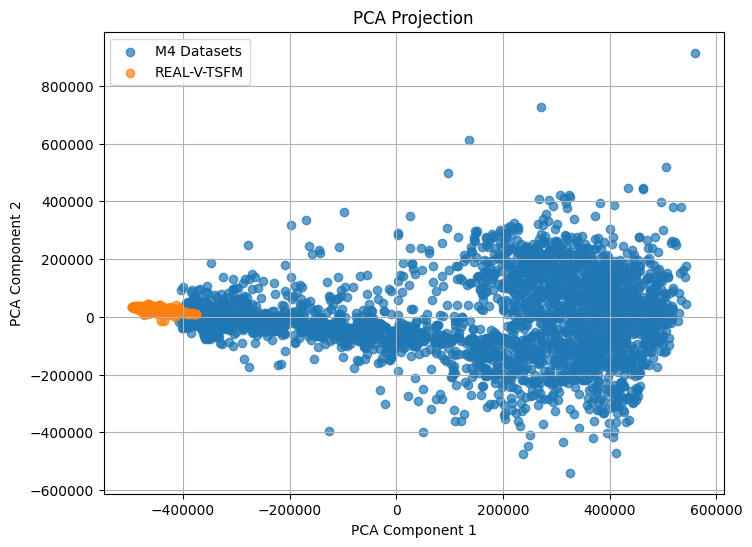

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.interpolate import interp1d


df = pd.read_json("/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened.jsonl", lines=True)
output_path = "/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened_predicted.jsonl"
filtered_df = df[df['prefix'].str.contains('swing|bird|airplane', case=False, na=False)]
df = filtered_df.copy()
ts_v_list = df['target'].tolist()

df = pd.read_csv("/home/snt/projects_lujun/benchmarking_nature_tsfm/data/M/M4-methods/Dataset/Train/Daily-train.csv")
output_path = "/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/Daily-train_predicted.jsonl"

def extract_time_series(row):
    return row.loc['V2':].dropna().tolist()

df_optimize = pd.DataFrame()
df_optimize['unique_id'] = df['V1']
df_optimize['target'] = df.apply(extract_time_series, axis=1)
df = df_optimize.copy()
# df = df[:540]
ts_m_list = df['target'].tolist()


max_len_v = max(len(ts) for ts in ts_v_list)
max_len_m = max(len(ts) for ts in ts_m_list)
max_length = max(max_len_v, max_len_m)

def interpolate_to_length(ts_list, target_length):
    new_ts_list = []
    for ts in ts_list:
        original_length = len(ts)
        if original_length == target_length:
            new_ts_list.append(ts)
            continue
        x_old = np.linspace(0, 1, original_length)
        x_new = np.linspace(0, 1, target_length)
        f = interp1d(x_old, ts, kind='linear')
        new_ts = f(x_new).tolist()
        new_ts_list.append(new_ts)
    return new_ts_list

new_ts_v_list = interpolate_to_length(ts_v_list, max_length)
new_ts_m_list = interpolate_to_length(ts_m_list, max_length)


ts_array1 = np.array(new_ts_m_list)
ts_array2 = np.array(new_ts_v_list)

pca = PCA(n_components=2)
pca_result1 = pca.fit_transform(ts_array1)

pca_result2 = pca.transform(ts_array2)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], label='M4 Datasets', alpha=0.7)
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], label='REAL-V-TSFM', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection')
plt.legend()
plt.grid(True)
plt.savefig("PCA_projection1.pdf")
plt.show()




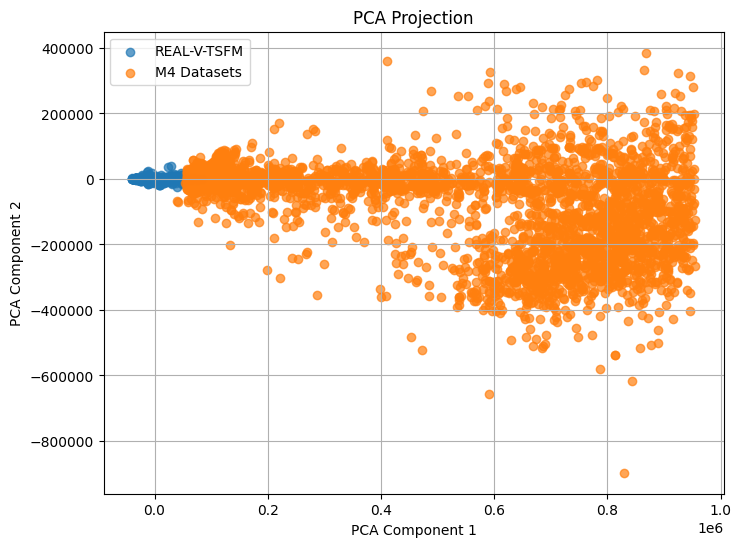

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.interpolate import interp1d


df = pd.read_json("/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened.jsonl", lines=True)
output_path = "/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/real-v-tsfm-shortened_predicted.jsonl"
filtered_df = df[df['prefix'].str.contains('swing|bird|airplane', case=False, na=False)]
df = filtered_df.copy()
ts_v_list = df['target'].tolist()

df = pd.read_csv("/home/snt/projects_lujun/benchmarking_nature_tsfm/data/M/M4-methods/Dataset/Train/Daily-train.csv")
output_path = "/home/snt/projects_lujun/benchmarking_nature_tsfm/data/dataset/Daily-train_predicted.jsonl"

def extract_time_series(row):
    return row.loc['V2':].dropna().tolist()

df_optimize = pd.DataFrame()
df_optimize['unique_id'] = df['V1']
df_optimize['target'] = df.apply(extract_time_series, axis=1)
df = df_optimize.copy()
# df = df[:540]
ts_m_list = df['target'].tolist()


max_len_v = max(len(ts) for ts in ts_v_list)
max_len_m = max(len(ts) for ts in ts_m_list)
max_length = max(max_len_v, max_len_m)

def interpolate_to_length(ts_list, target_length):
    new_ts_list = []
    for ts in ts_list:
        original_length = len(ts)
        if original_length == target_length:
            new_ts_list.append(ts)
            continue
        x_old = np.linspace(0, 1, original_length)
        x_new = np.linspace(0, 1, target_length)
        f = interp1d(x_old, ts, kind='linear')
        new_ts = f(x_new).tolist()
        new_ts_list.append(new_ts)
    return new_ts_list

new_ts_v_list = interpolate_to_length(ts_v_list, max_length)
new_ts_m_list = interpolate_to_length(ts_m_list, max_length)


ts_array1 = np.array(new_ts_v_list)
ts_array2 = np.array(new_ts_m_list)

pca = PCA(n_components=2)
pca_result1 = pca.fit_transform(ts_array1)

pca_result2 = pca.transform(ts_array2)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], label='REAL-V-TSFM', alpha=0.7)
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], label='M4 Datasets', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection')
plt.legend()
plt.grid(True)
plt.savefig("PCA_projection2.pdf")
plt.show()


